# Get required asset from the repository

In [ ]:
!git clone https://github.com/Richterite/autonomous-vehicle.git

Cloning into 'autonomous-vehicle'...
remote: Enumerating objects: 14333, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 14333 (delta 0), reused 0 (delta 0), pack-reused 14331 (from 2)
Receiving objects: 100% (14333/14333), 272.17 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (14296/14296), done.


In [ ]:
!ls autonomous-vehicle

asset  engine  main.py	readme.md


# Install albumentationsx for Augmentation module

In [ ]:
!pip install albumentationsx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.8/418.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.6/463.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.41.4
    Uninstalling pydantic_core-2.41.4:
      Successfully uninstalled pydantic_core-2.41.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.12.3
    Uninstalling pydantic-2.12.3:
      Successfully uninstalled pydantic-2.12.3
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.24
    Uninstalling albucore-0.0.24:
      Successfully uninstalled albucore-0.0.24
ERROR: pip's dependency resolver does not currently take into account all the packages that 

# Import Required Module

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os
import ntpath
import albumentations as A

# Data Preprocessing

In [ ]:
DATA_DIR = '/content/autonomous-vehicle/asset/data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

In [ ]:
dataset = pd.read_csv(os.path.join(DATA_DIR, 'driving_log.csv'), names = columns, delimiter=',')
pd.set_option('display.max_colwidth', 0)

In [ ]:
dataset.head()

center  \
0  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\center_2025_12_09_10_12_42_185.jpg   
1  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\center_2025_12_09_10_12_42_256.jpg   
2  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\center_2025_12_09_10_12_42_326.jpg   
3  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\center_2025_12_09_10_12_42_395.jpg   
4  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\center_2025_12_09_10_12_42_462.jpg   

                                                                                               left  \
0  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\left_2025_12_09_10_12_42_185.jpg   
1  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\left_2025_12_09_10_12_42_256.jpg   
2  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\left_2025_12_09_10_12_42_326.jpg   
3  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\left_2025_12_09_10_12_42_395.jpg   
4  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\left_2025_12_09_10_12_42_462.jpg   

                                                                                               right  \
0  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\right_2025_12_09_10_12_42_185.jpg   
1  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\right_2025_12_09_10_12_42_256.jpg   
2  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\right_2025_12_09_10_12_42_326.jpg   
3  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\right_2025_12_09_10_12_42_395.jpg   
4  D:\Manuskrip\CODIINGG\project\autonomous-vehicle\asset\data\IMG\right_2025_12_09_10_12_42_462.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      24.46557  
1  0.0       0.0       0.0      24.26926  
2  0.0       0.0       0.0      24.12289  
3  0.0       0.0       0.0      23.92892  
4  0.0       0.0       0.0      23.78447

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

dataset['center'] = dataset['center'].apply(path_leaf)
dataset['left'] = dataset['left'].apply(path_leaf)
dataset['right'] = dataset['right'].apply(path_leaf)

In [ ]:
num_bins = 25 # number of interval
samples_per_bin = 400 # every bin can have max number
hist, bins = np.histogram(dataset['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(dataset['steering']), np.max(dataset['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
print('total_data', len(dataset))
remove_list = []
for j in range(num_bins):
  list_ = dataset[
      (dataset['steering'] >= bins[j]) & (dataset['steering'] <= bins[j+1])
  ].index.tolist()

  if len(list_) > samples_per_bin:
    list_ = shuffle(list_)
    list_tobe_removed = list_[samples_per_bin:]
    remove_list.extend(list_tobe_removed)

print('removed', len(remove_list))
dataset.drop(remove_list, inplace=True)
print('remaining', len(dataset))


total_data 4760
removed 3298
remaining 1462


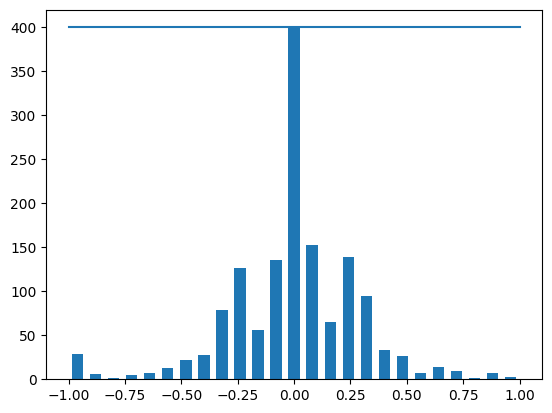

In [ ]:
hist,_ = np.histogram(dataset['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(dataset['steering']), np.max(dataset['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
def load_img_sterring(datadir, df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_path = np.asarray(image_path)
  steering = np.asarray(steering)
  return image_path, steering

In [ ]:
image_path, steerings = load_img_sterring(DATA_DIR + '/IMG', dataset)
x_train, x_val, y_train, y_val = train_test_split(image_path, steerings, test_size=0.2, random_state=6)

/tmp/ipython-input-2876344893.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
/tmp/ipython-input-2876344893.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


In [ ]:
print(len(x_train), len(x_val))

1169 293


Text(0.5, 1.0, 'Validation Set')

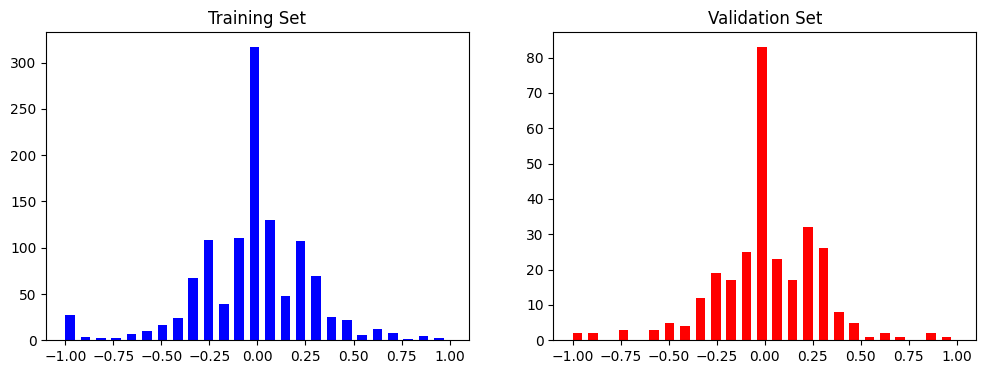

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
ax[0].set_title('Training Set')

ax[1].hist(y_val, bins=num_bins, width=0.05, color='red')
ax[1].set_title('Validation Set')

# Augmentation Configuration

In [ ]:
def zoom(image):
  zoom = A.Compose([
      A.Affine(scale=(1,1.3))
  ])
  augmented = zoom(image=image)
  return augmented['image']

In [ ]:
def pan(image):
  pan = A.Compose([
      A.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  ])
  augmented = pan(image=image)
  return augmented['image']

In [ ]:
def brightness(image):
  brightness = A.Compose([
      A.RandomBrightnessContrast(brightness_limit=0.3)
  ])
  augmented = brightness(image=image)
  return augmented['image']

In [ ]:
def flip(image, steering_angle):
  flip = A.Compose([
      A.HorizontalFlip(p=1.0)
  ])
  steering_angle = -steering_angle
  augmented = flip(image=image)
  return augmented['image'], steering_angle

-0.0


Text(0.5, 1.0, 'Augmented Image')

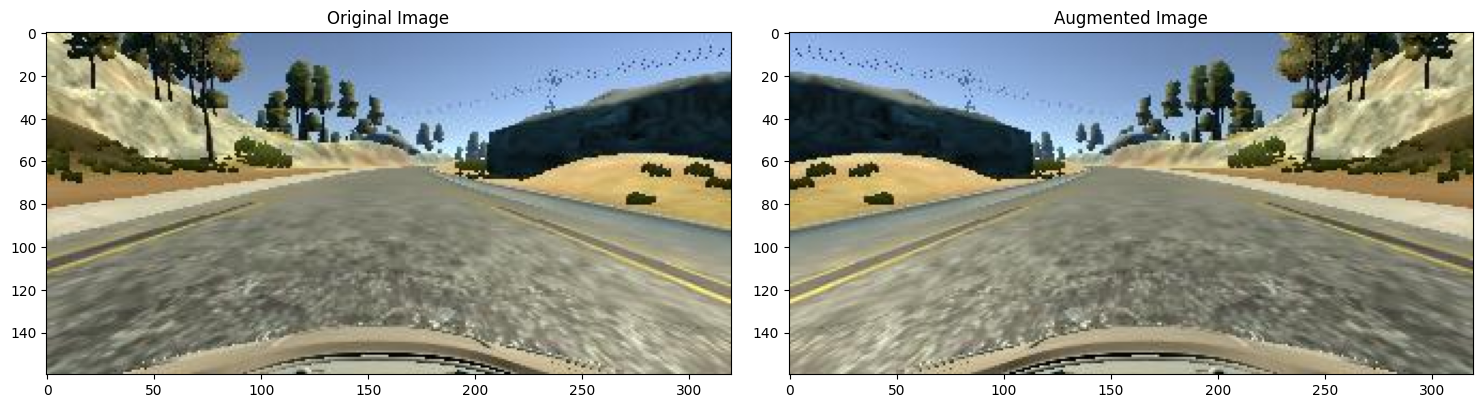

In [ ]:
random_index = random.randint(0, 1000)
image = image_path[random_index]
ster = steerings[random_index]
original_image = mpimg.imread(image)
zoomed_image = brightness(original_image)
flipped_image, flipped_steering = flip(original_image, ster)
print(flipped_steering)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image')

ax[1].imshow(flipped_image)
ax[1].set_title('Augmented Image')

In [ ]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = flip(image, steering_angle)

  return image, steering_angle

In [ ]:
fig, ax = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()

for i in range(10):
  random_index = random.randint(0, len(image_path) - 1)
  random_image = image_path[random_index]
  random_steering = steerings[random_index]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  ax[i, 0].imshow(original_image)
  ax[i, 0].set_title('Original Image')

  ax[i, 1].imshow(augmented_image)
  ax[i, 1].set_title('Augmented Image')

In [ ]:
def img_preprocess(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

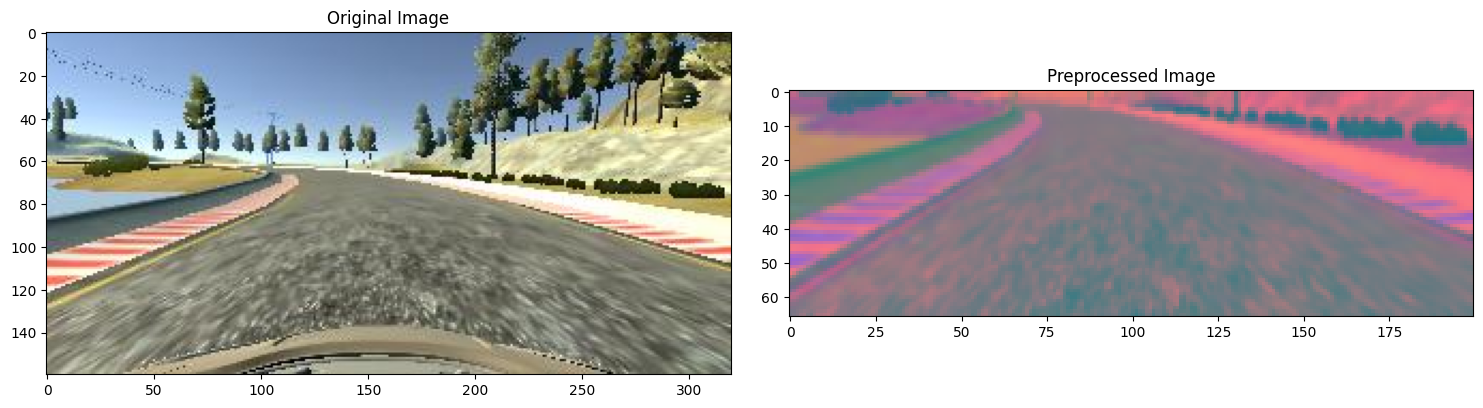

In [ ]:
image = image_path[100]
org_image = mpimg.imread(image)
preprocessed_image = img_preprocess(org_image)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
ax[0].imshow(org_image)
ax[0].set_title('Original Image')

ax[1].imshow(preprocessed_image)
ax[1].set_title('Preprocessed Image')


# Batch Generator for training purpose

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, is_training):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      if is_training:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield np.asarray(batch_img), np.asarray(batch_steering)


In [ ]:
x_train_gen, y_train_gen = next(batch_generator(x_train, y_train, 1, True))
x_val_gen, y_val_gen = next(batch_generator(x_val, y_val, 1, False))


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(x_train_gen[0])
ax[0].set_title('Training Image')

ax[1].imshow(x_val_gen[0])
ax[1].set_title('Validation Image')

Text(0.5, 1.0, 'Validation Image')

In [ ]:
# x_train = np.array(list(map(img_preprocess, x_train)))
# x_val = np.array(list(map(img_preprocess, x_val)))

(1009, 66, 200, 3)


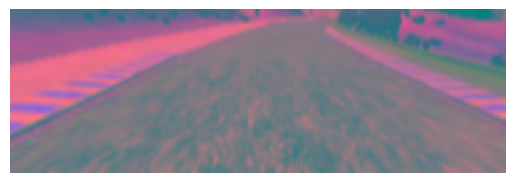

In [ ]:
# plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
# plt.axis('off')
# print(x_train.shape)

# Deep Learning Model Init

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5,5), strides=(2,2), activation='elu'))

  model.add(Conv2D(48, (5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, (3,3), activation='elu'))
  model.add(Conv2D(64, (3,3), activation='elu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(1))

  model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
  return model

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

None


# Model Training

In [ ]:
history = model.fit(batch_generator(x_train, y_train, batch_size=100, is_training=True),
                    steps_per_epoch=300,
                    epochs=10,
                    validation_data=batch_generator(x_val, y_val, 100, False),
                    validation_steps=200,
                    verbose=1,
                    shuffle=1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - loss: 0.1071 - val_loss: 0.0609
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 103s 346ms/step - loss: 0.0777 - val_loss: 0.0542
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 103s 344ms/step - loss: 0.0701 - val_loss: 0.0523
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 104s 346ms/step - loss: 0.0564 - val_loss: 0.0457
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 341ms/step - loss: 0.0514 - val_loss: 0.0460
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 340ms/step - loss: 0.0493 - val_loss: 0.0486
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 337ms/step - loss: 0.0460 - val_loss: 0.0445
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 339ms/step - loss: 0.0450 - val_loss: 0.0441
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 338ms/step - loss: 0.0438 - val_loss: 0.0429
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 337ms/step - loss: 0.0413 - val_loss: 0.0441


# Model Evaluation

Text(0.5, 0, 'Epoch')

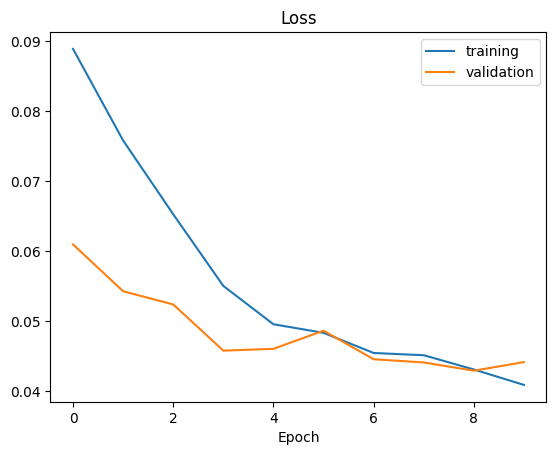

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>